In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

src_folder = '/content/drive/My Drive/cats and dogs'
dst_folder = '/content/your_folder'

import os

if os.path.exists(dst_folder):
    print("Destination folder already exists.")
else:
    shutil.copytree(src_folder, dst_folder)



In [ ]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [ ]:
content= os.listdir(dst_folder)
for a in content :
  print(a)

__MACOSX
dogs
cats


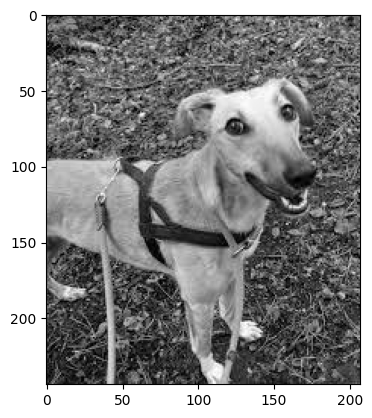

In [ ]:
animals=["dogs","cats"]
for ani in animals:
  path=os.path.join(dst_folder,ani)#direct folder
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

In [ ]:
print (img_array)
print(len(img_array))
print(len(img_array[0]))

[[ 46  16  42 ... 115  92 114]
 [ 39  39  58 ... 106 118  98]
 [ 27  67  27 ...  98 107 132]
 ...
 [ 25  55  28 ...  92  82  80]
 [ 25  77   0 ...  83  60  69]
 [ 48  15  66 ... 120  80  95]]
244
207


<function matplotlib.pyplot.show(close=None, block=None)>

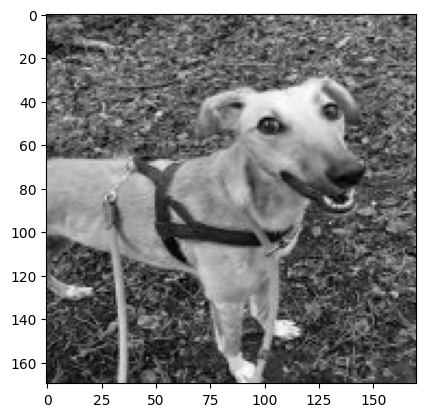

In [ ]:
imgsiz=170
new_array= cv2.resize(img_array,(imgsiz,imgsiz))
plt.imshow(new_array, cmap="gray")
plt.show

In [ ]:
training_data=[]
def create_training_data():
  for ani in animals:
    class_num = animals.index(ani)
    path=os.path.join(dst_folder,ani)#direct folder
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        new_array= cv2.resize(img_array,(imgsiz,imgsiz))
        training_data.append([new_array,class_num])
      except exception as e:
        pass

create_training_data()




In [ ]:
print(len(training_data))

140


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
0
1
0
1
1
1
1
1
1


In [ ]:
x=[]
y=[]

In [ ]:
for features, label in training_data:
  x.append(features)
  y.append(label)

x=np.array(x).reshape(-1,imgsiz,imgsiz,1)

In [ ]:
x[1]

array([[[95],
        [96],
        [96],
        ...,
        [54],
        [54],
        [54]],

       [[95],
        [96],
        [96],
        ...,
        [56],
        [56],
        [54]],

       [[96],
        [96],
        [96],
        ...,
        [58],
        [58],
        [56]],

       ...,

       [[49],
        [48],
        [48],
        ...,
        [72],
        [70],
        [75]],

       [[47],
        [46],
        [46],
        ...,
        [67],
        [65],
        [71]],

       [[46],
        [46],
        [46],
        ...,
        [69],
        [63],
        [67]]], dtype=uint8)

In [ ]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

In [ ]:
x[1]

array([[[95],
        [96],
        [96],
        ...,
        [54],
        [54],
        [54]],

       [[95],
        [96],
        [96],
        ...,
        [56],
        [56],
        [54]],

       [[96],
        [96],
        [96],
        ...,
        [58],
        [58],
        [56]],

       ...,

       [[49],
        [48],
        [48],
        ...,
        [72],
        [70],
        [75]],

       [[47],
        [46],
        [46],
        ...,
        [67],
        [65],
        [71]],

       [[46],
        [46],
        [46],
        ...,
        [69],
        [63],
        [67]]], dtype=uint8)

In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
X=pickle.load(open("x.pickle", "rb"))
Y=pickle.load(open("y.pickle", "rb"))
X=np.array(X)
Y=np.array(Y)
X=X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Rest of the model remains the same...


model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer= "adam",
              metrics=['accuracy'])

model.fit(X,Y, batch_size=32, epochs=4, validation_split=0.05)



Epoch 1/4
5/5 [==============================] - 7s 251ms/step - loss: 4.9146 - accuracy: 0.5113 - val_loss: 1.2216 - val_accuracy: 0.4286
Epoch 2/4
5/5 [==============================] - 0s 33ms/step - loss: 0.9532 - accuracy: 0.4887 - val_loss: 0.6882 - val_accuracy: 0.7143
Epoch 3/4
5/5 [==============================] - 0s 32ms/step - loss: 0.6659 - accuracy: 0.6316 - val_loss: 0.6772 - val_accuracy: 0.4286
Epoch 4/4
5/5 [==============================] - 0s 34ms/step - loss: 0.5897 - accuracy: 0.7444 - val_loss: 0.7446 - val_accuracy: 0.4286


In [ ]:
print(len(X))
print(len(Y))

140
140


In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/WIN_20240602_16_12_31_Pro.jpg', color_mode='grayscale', target_size=(X.shape[1], X.shape[2]))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image array
img_array = img_array / 255.0

# Add an extra dimension to the array (batch size of 1)
img_array = np.expand_dims(img_array, axis=0)



In [ ]:
print(model.predict(img_array))
if model.predict(img_array)>0.63:
  print("cat")
else:
  print("dog")

1/1 [==============================] - 0s 18ms/step
[[0.61730313]]
1/1 [==============================] - 0s 17ms/step
dog
